## Table of Content

1. [Problem Statement](#section1)<br>
2. [Getting the System ready](#section2)<br>
    - 2.1 [Loading Packages](#section201)<br/>
    - 2.2 [Reading Data](#section202)<br/>
3. [Understaning Data](#section3)<br>
4. [Some Exploratory Data Analysis With Iris](#section4)<br>
5. [Applying ML Algorithms](#section5)<br>
    - 5.1 [KNN](#section501)<br/>
    - 5.2 [K Means](#section502)<br/>
    - 5.3 [SVC](#section503)<br/>
    - 5.4 [Decision Tree](#section504)<br/>
    - 5.5 [Random Forest](#section505)<br/>
    - 5.6 [Gaussian NB](#section506)<br/>
    - 5.7 [Logistic Model](#section507)<br/>
    - 5.8 [Identifying the Components that make a Good Candy](#section508)<br/>
    - 5.9 [Feature Importance of Various Attributes](#section509)<br/>
6. [Conclusion](#section6)<br>
    


## 1. Problem Statement 

* Create machine learning model that can classify the different species of the Iris flower.

## 2. Getting the system ready and loading the data

## 2.1 Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 2.2 Reading data


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [3]:
iris = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Understanding the data


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
iris.drop('Id',axis=1,inplace=True)

# 4. Some Exploratory Data Analysis With Iris

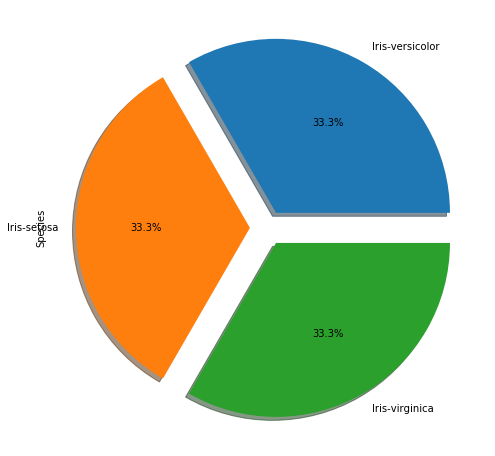

In [6]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

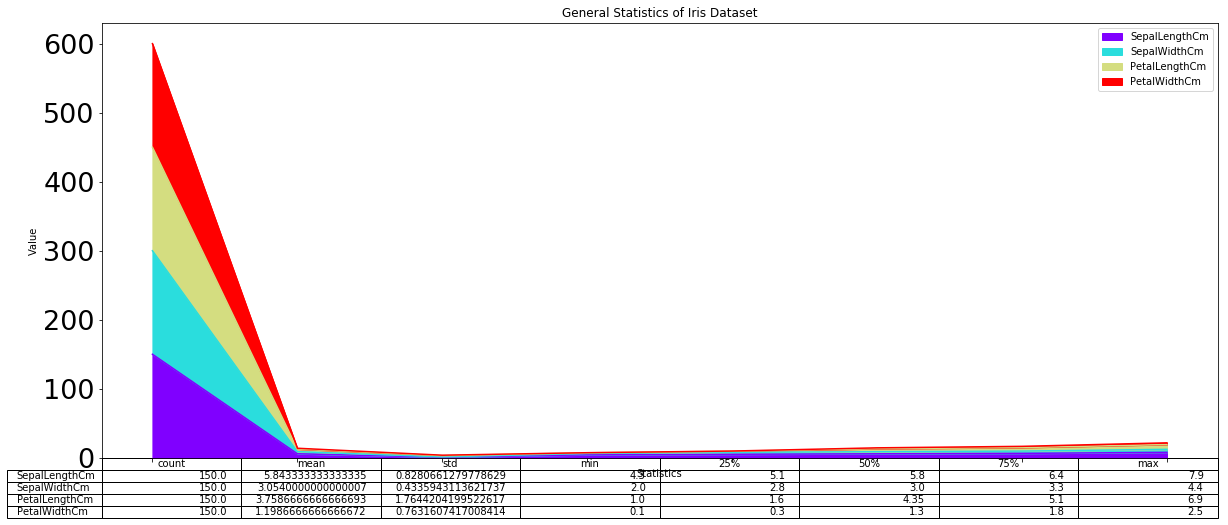

In [7]:
iris.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

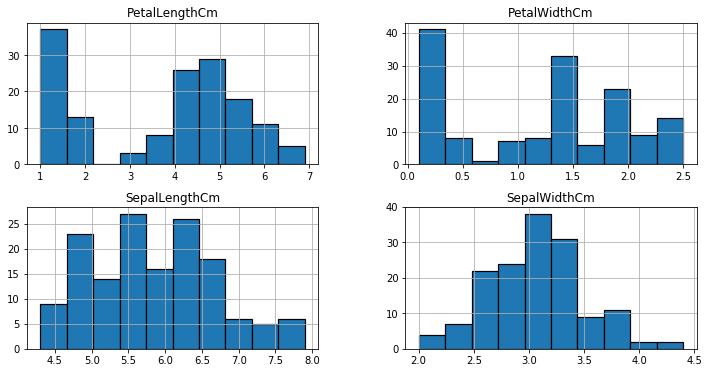

In [8]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

*  __Pair Plot__

C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


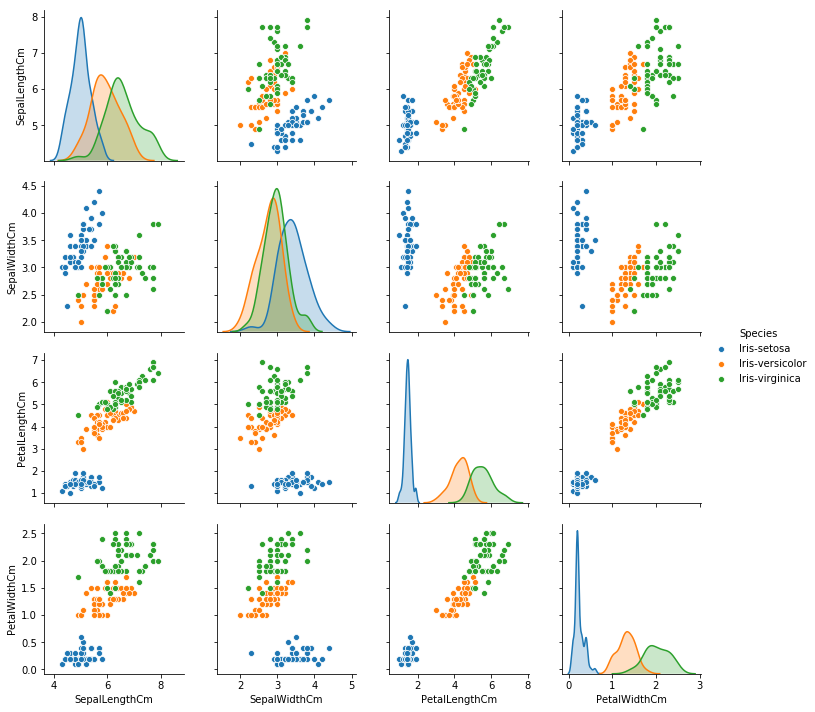

In [9]:
sns.pairplot(iris,hue='Species')

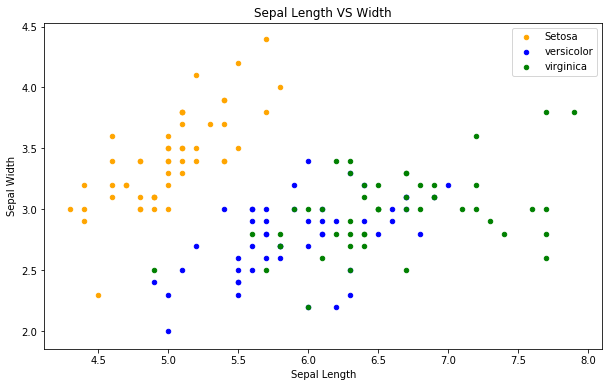

In [10]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

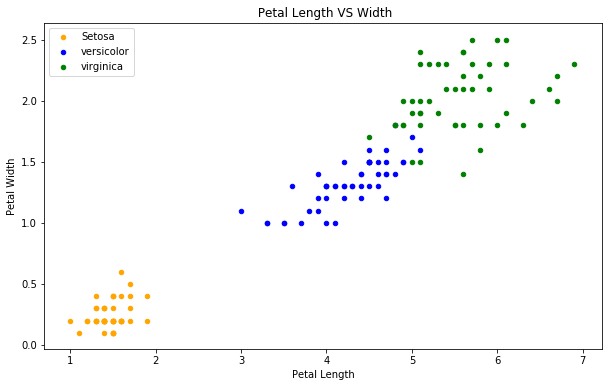

In [11]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

* __Violin Plot__

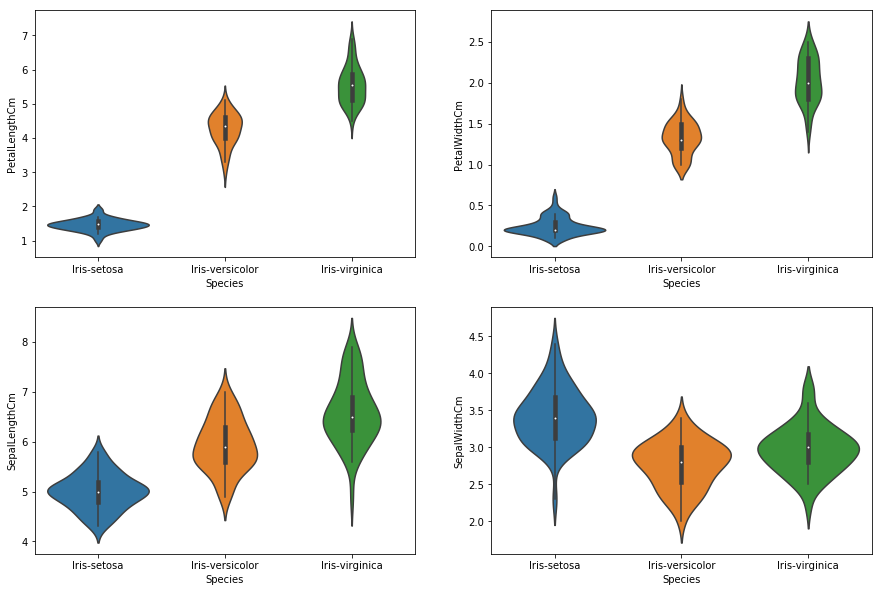

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

* __HeatMap__

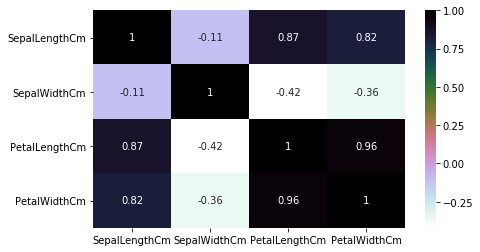

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

* __Box Plot__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001254E609128>,
      dtype=object)

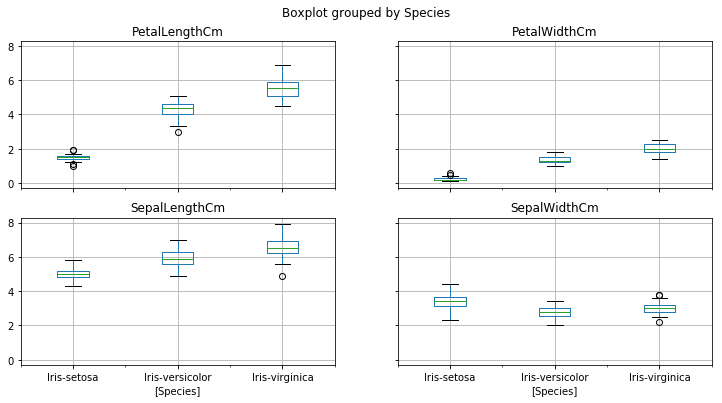

In [14]:
iris.boxplot(by="Species", figsize=(12, 6))

* __Andrew Curve__

C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


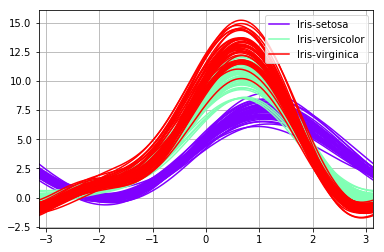

In [15]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris,"Species",colormap='rainbow')
plt.show()
plt.ioff()

## 5. Applying ML Algorithms

## 5.1 KNN

In [16]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris[feature_columns].values
y = iris['Species'].values

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

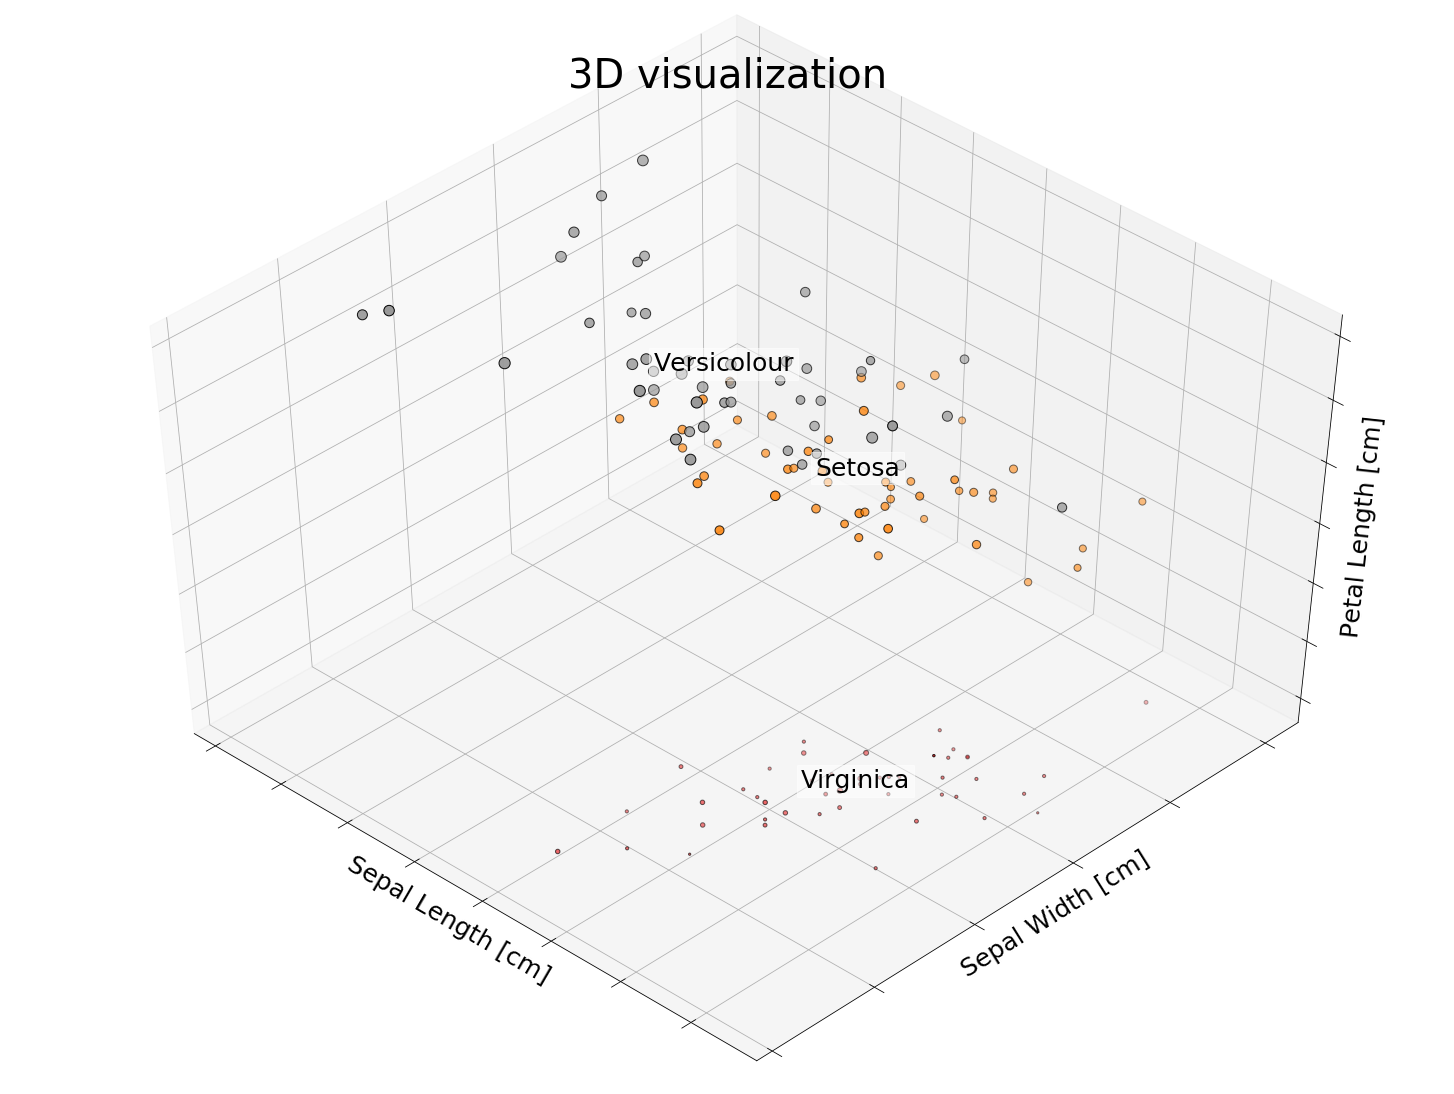

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 120 samples in the training set and 30 samples in the test set



In [21]:
X = iris.iloc[:,0:4].values
Y = iris.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=21)
knn=KNeighborsClassifier(n_neighbors= 8)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print("Score : ",knn.score(x_test,y_test))
print('Confusion Matrix :')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Score :  0.8888888888888888
Confusion Matrix :
[[14  0  0]
 [ 0 14  2]
 [ 0  3 12]]


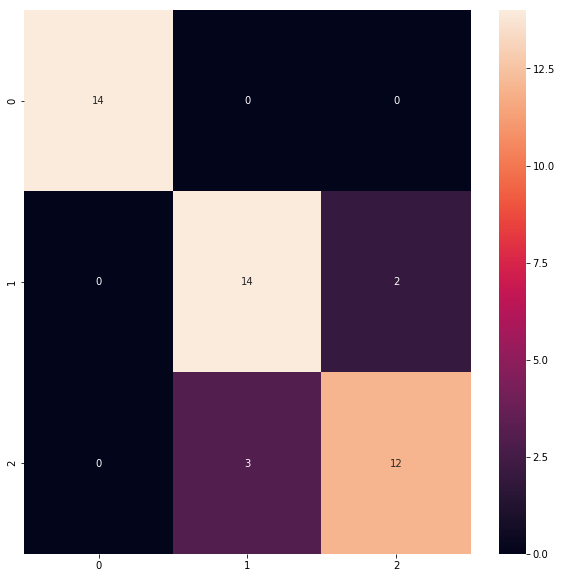

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()

## 5.2 K Means

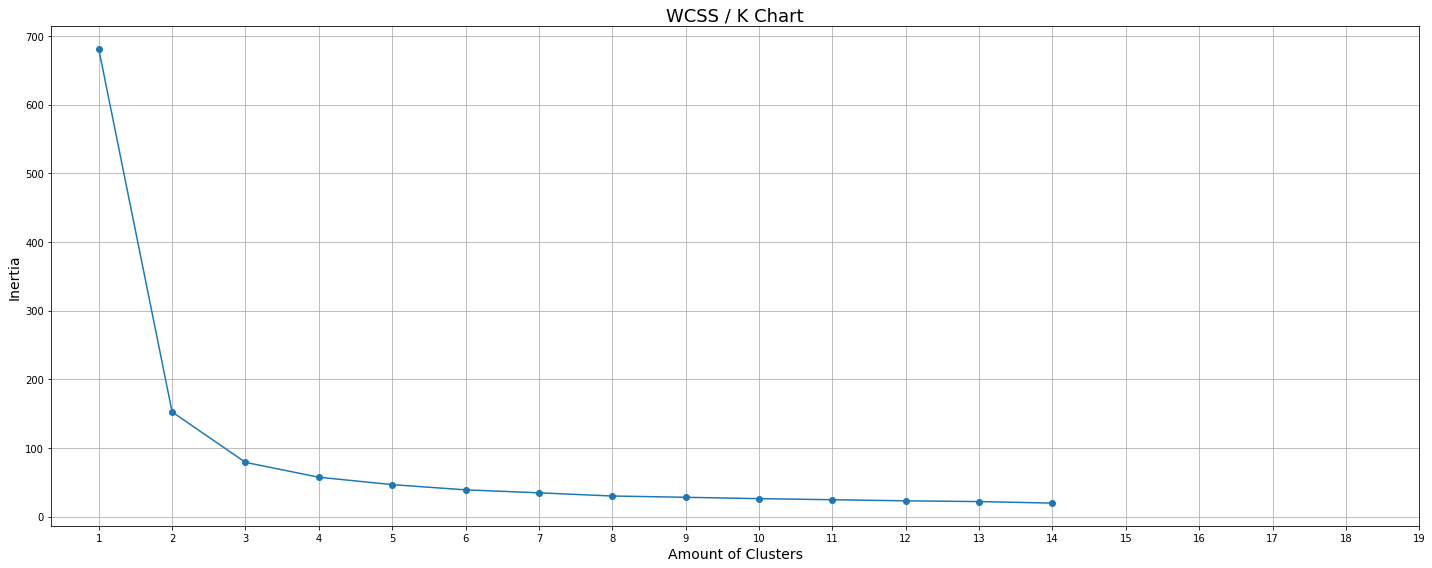

In [23]:
features = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

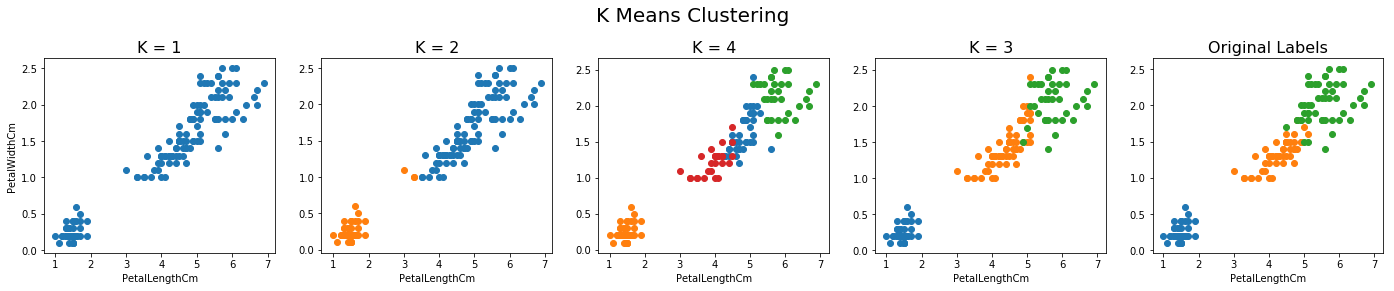

In [24]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-setosa"],iris.PetalWidthCm[iris.Species == "Iris-setosa"])
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-versicolor"],iris.PetalWidthCm[iris.Species == "Iris-versicolor"])
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-virginica"],iris.PetalWidthCm[iris.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

## 5.3 SVC

In [25]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
SVC_prediction=model.predict(x_test)
print("the accuracy of the Support Vector Machine Classifier model is :",accuracy_score(y_test,SVC_prediction))
cm=confusion_matrix(SVC_prediction,y_test)

the accuracy of the Support Vector Machine Classifier model is : 0.9333333333333333


C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


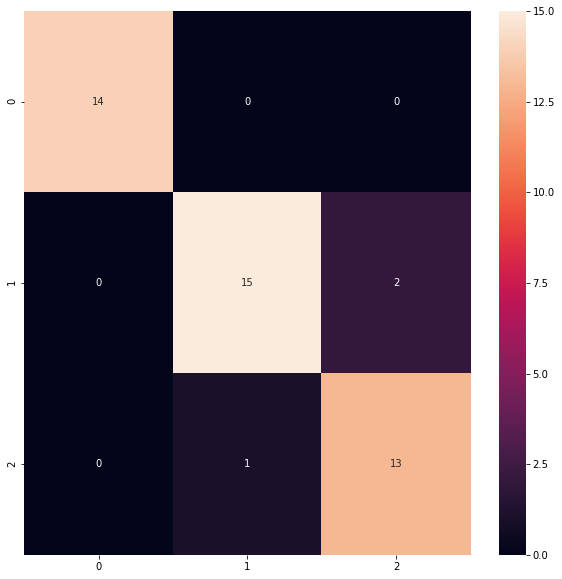

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()

## 5.4 DT

In [27]:
DTC=DecisionTreeClassifier(max_leaf_nodes=3)
DTC.fit(x_train,y_train)
DTC_prediction=DTC.predict(x_test)
print('The accuracy of the Decision Tree Classifier model is',accuracy_score(DTC_prediction,y_test))
cm=confusion_matrix(DTC_prediction,y_test)

The accuracy of the Decision Tree Classifier model is 0.8666666666666667


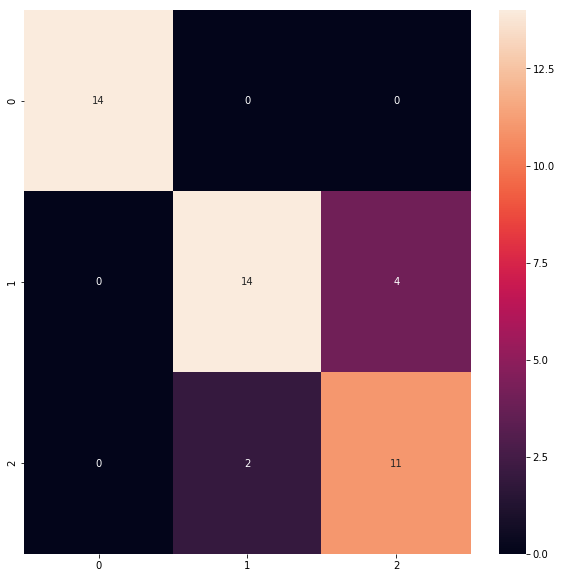

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()

## 5.5 Random forest

In [29]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC_prediction=RFC.predict(x_test)
print('The accuracy of the RandomForestClassifier model is',accuracy_score(RFC_prediction,y_test))
cm=confusion_matrix(RFC_prediction,y_test)

The accuracy of the RandomForestClassifier model is 0.9333333333333333


C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


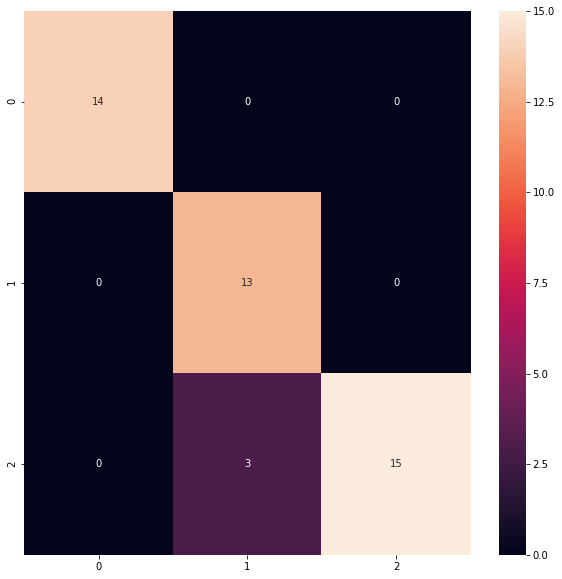

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()

## 5.6 Gaussian NB

In [31]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)
GNB_prediction=GNB.predict(x_test)
print('The accuracy of the GaussionNB model is',accuracy_score(GNB_prediction,y_test))
cm=confusion_matrix(GNB_prediction,y_test)

The accuracy of the GaussionNB model is 0.9555555555555556


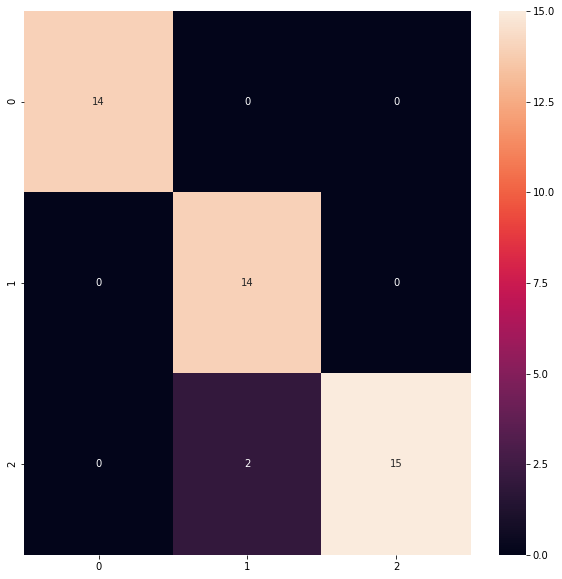

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()

## 5.7 Logistic 

In [33]:
X = iris.iloc[:,0:4].values
Y = iris.iloc[:,-1].values
#Where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
labelencoder_Y=LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


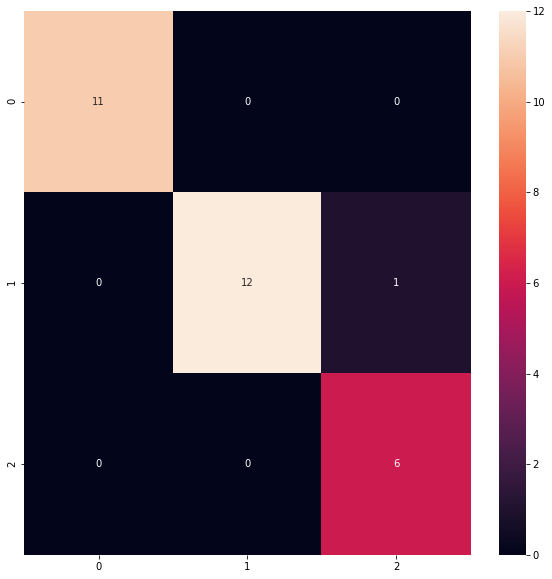

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()

# 6. Conclusion

* From above analysis we can conclude that Gaussian NB Model fits the best as the accuracy score is very high.
* K Means, SVc and Random Forest model also fit pretty well for Iris dataset.